## Performing Exploratory Data Analysis on the dataset


In [3]:
import pandas as pd

In [5]:
data = pd.read_csv("train.csv")

In [7]:
data.head(5)

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name
0,213754,SORORTY12A67ADD67E,TRJIEJX12903CF2202,-0.682725,0.316758,Dark Tranquillity,Insanity's Crescendo
1,216752,SOVJXGK12A8AE4760C,TRLBHVY128F4242C31,-1.400403,1.538229,Anorexia Nervosa,Stabat mater dolorosa
2,239138,SOACXLC12AB018218D,TRQJZHB128F92FA42D,-1.935250,-0.655810,Jimmy Witherspoon,Ain't Nobody's Business
3,254391,SOUTMGD12A8AE47448,TRCXLKK128F42366BF,0.815393,0.662457,Uniting Nations,Out Of Touch
4,266313,SOTITAA12A6D4F8DA4,TRPMWQM128F932C0C8,1.257460,1.086515,The Walkmen,Brandy alexander


In [9]:
#dataset information
print("Dataset info:")
print(data.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11267 entries, 0 to 11266
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dzr_sng_id    11267 non-null  int64  
 1   MSD_sng_id    11267 non-null  object 
 2   MSD_track_id  11267 non-null  object 
 3   valence       11267 non-null  float64
 4   arousal       11267 non-null  float64
 5   artist_name   11267 non-null  object 
 6   track_name    11267 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 616.3+ KB
None


In [11]:
#Checking for null values
null_values = data.isnull().sum()
print("\nMissing Values:")
print(null_values[null_values > 0])


Missing Values:
Series([], dtype: int64)


In [13]:
#summary statistics for columns in the dataset
print("\nSummary Statistics for columns:")
print(data.describe())


Summary Statistics for columns:
         dzr_sng_id       valence       arousal
count  1.126700e+04  11267.000000  11267.000000
mean   2.029891e+07     -0.066351      0.196489
std    3.095666e+07      1.062041      0.965429
min    2.137540e+05     -2.148097     -2.333604
25%    1.574418e+06     -1.040199     -0.598918
50%    3.839154e+06      0.047232      0.040198
75%    1.695940e+07      0.815393      0.846830
max    1.237834e+08      1.546714      2.755091


In [15]:
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


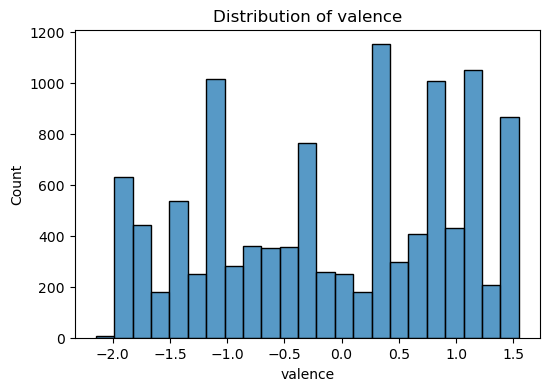

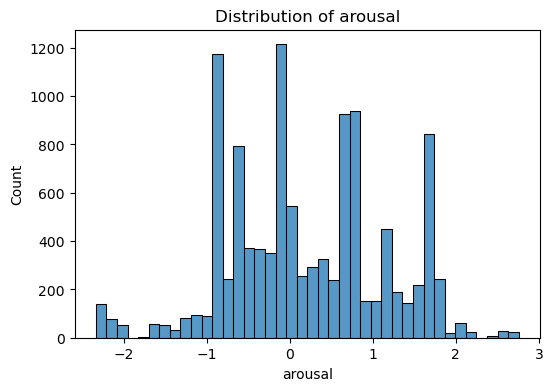

In [17]:
#Visualizing the columns valence and arousal
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['valence', 'arousal']
for column in columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[column])
    plt.title(f"Distribution of {column}")
    plt.show()

In [18]:
#finding the correlation between features i.e. valence and arousal
numeric_data = data.select_dtypes(include=['float64'])

correlation = numeric_data.corr()
print(correlation)


          valence   arousal
valence  1.000000  0.254626
arousal  0.254626  1.000000


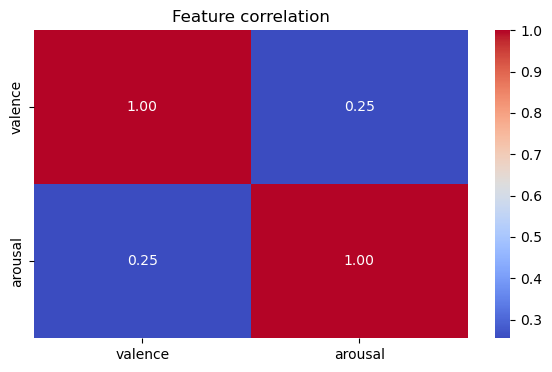

In [19]:
#plotting the correlation in heatmap
plt.figure(figsize = (7, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature correlation")
plt.show()

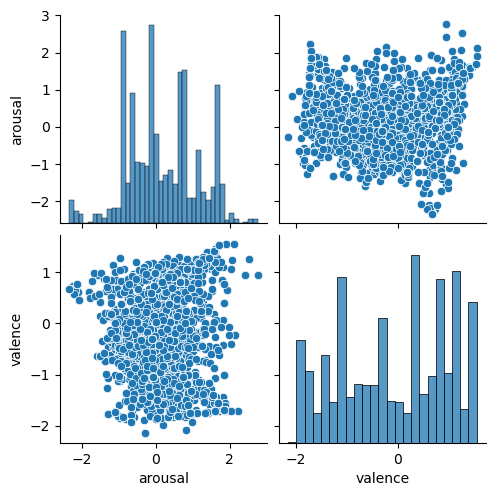

In [20]:
# Pairplot to analyze potential clusters
sns.pairplot(data[['arousal', 'valence']])
plt.show()

## Feature Engineering and Target Definition

In [22]:
#setting thresholds for the arousal and valence values to map it with emotions
def map_emotion(row):
    valence = row['valence']
    arousal = row['arousal']
    if valence>0.5 and arousal>2.0:
        return 'Excited'
    elif valence>0.5 and 0.0<=arousal <=2.0:
        return 'Happy'
    elif valence>0.5 and arousal<0.0:
        return 'Relaxed'
    elif -0.5<=valence<=0.5 and arousal>2.0:
        return 'Anxious'
    elif -0.5<=valence<=0.5 and 0.0<=arousal<=2.0:
        return 'Content'
    elif -0.5<=valence<=0.5 and arousal<0.0:
        return 'Calm'
    elif valence<-0.5 and arousal>2.0:
        return 'Angry'
    elif valence<-0.5 and 0.0<=arousal<=2.0:
        return 'Sad'
    else:
        return 'Depressed'
data['mood'] = data.apply(map_emotion, axis=1)
print(data['mood'].value_counts())

mood
Happy        3256
Calm         2361
Depressed    2350
Sad          1754
Relaxed       743
Content       664
Excited       105
Angry          31
Anxious         3
Name: count, dtype: int64


In [23]:
data

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,mood
0,213754,SORORTY12A67ADD67E,TRJIEJX12903CF2202,-0.682725,0.316758,Dark Tranquillity,Insanity's Crescendo,Sad
1,216752,SOVJXGK12A8AE4760C,TRLBHVY128F4242C31,-1.400403,1.538229,Anorexia Nervosa,Stabat mater dolorosa,Sad
2,239138,SOACXLC12AB018218D,TRQJZHB128F92FA42D,-1.935250,-0.655810,Jimmy Witherspoon,Ain't Nobody's Business,Depressed
3,254391,SOUTMGD12A8AE47448,TRCXLKK128F42366BF,0.815393,0.662457,Uniting Nations,Out Of Touch,Happy
4,266313,SOTITAA12A6D4F8DA4,TRPMWQM128F932C0C8,1.257460,1.086515,The Walkmen,Brandy alexander,Happy
...,...,...,...,...,...,...,...,...
11262,114422254,SOQXNDB12D021B22BC,TREIYBW128F426008E,-1.935250,-0.655810,Dolly Parton,Lonely Comin' Down,Depressed
11263,114422258,SOXFOGP12CF5F88A17,TRCISIH128F425D737,1.178325,1.183311,Dolly Parton,Here You Come Again,Happy
11264,114530742,SOWCYFL12AB017F3F2,TRWTZLE128F93326EB,-1.400403,1.538229,Million Dead,Breaking the Back,Sad
11265,120730030,SOLBMAO12D021984E4,TRLCQRI128F92F5EE4,0.034953,-0.689612,Jeff Buckley,Calling You,Calm


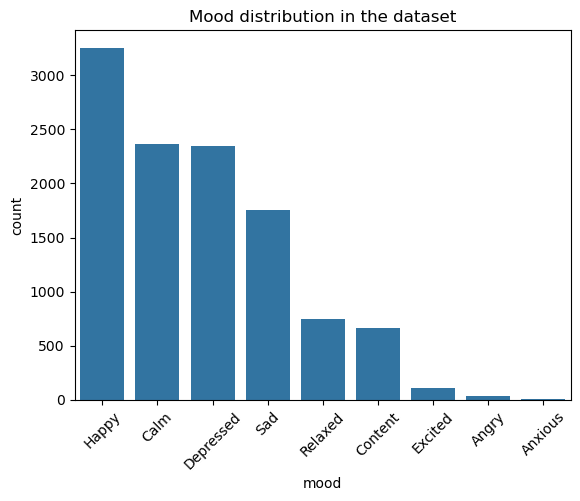

In [24]:
#visualizing the emotion distribution of the dataset
sns.countplot(x='mood', data=data, order= data['mood'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Mood distribution in the dataset")
plt.show()

In [25]:
#Identifying columns into feature and target columns
#Feature columns
X = data[['valence','arousal']]
#Target column
y = data['mood']

In [26]:
#splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Using Random Forest Algorithm

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#initializing the random forest model
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
#training the model
ranfor_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
#evaluating the random forest model
ranfor_y_pred = ranfor_model.predict(X_test)
print("Random Forest Evaluation Report:")
print(classification_report(y_test, ranfor_y_pred))

Random Forest Evaluation Report:
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         6
        Calm       1.00      1.00      1.00       478
     Content       1.00      1.00      1.00       155
   Depressed       1.00      1.00      1.00       467
     Excited       1.00      0.90      0.95        21
       Happy       1.00      1.00      1.00       650
     Relaxed       1.00      1.00      1.00       139
         Sad       1.00      1.00      1.00       338

    accuracy                           1.00      2254
   macro avg       1.00      0.99      0.99      2254
weighted avg       1.00      1.00      1.00      2254



In [30]:
train_pred = ranfor_model.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00        25
     Anxious       1.00      1.00      1.00         3
        Calm       1.00      1.00      1.00      1883
     Content       1.00      1.00      1.00       509
   Depressed       1.00      1.00      1.00      1883
     Excited       1.00      1.00      1.00        84
       Happy       1.00      1.00      1.00      2606
     Relaxed       1.00      1.00      1.00       604
         Sad       1.00      1.00      1.00      1416

    accuracy                           1.00      9013
   macro avg       1.00      1.00      1.00      9013
weighted avg       1.00      1.00      1.00      9013



In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = {
      # Number of trees in the forest
    'n_estimators': [100, 200, 300],
     # Maximum depth of the tree
    'max_depth': [10, 20, None],  
    # Minimum samples required to split a node
    'min_samples_split': [2, 5, 10],  
    # Minimum samples required at each leaf node
    'min_samples_leaf': [1, 2, 4]     
}

# base Random Forest model
ranfor_model = RandomForestClassifier(random_state=42)

#Initializing GridSearchCV
grid_search = GridSearchCV(estimator=ranfor_model, param_grid=param_grid, 
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

#Fitting the training data on GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieving the best parameters
print("Best Parameters Found:", grid_search.best_params_)
best_ranfor_model = grid_search.best_estimator_

# Evaluating the model with the best parameters
ranfor_y_pred = best_ranfor_model.predict(X_test)
print("Random Forest Evaluation Report (After Hyperparameter Tuning):")
print(classification_report(y_test, ranfor_y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters Found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Evaluation Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         6
        Calm       1.00      1.00      1.00       478
     Content       1.00      1.00      1.00       155
   Depressed       1.00      1.00      1.00       467
     Excited       1.00      0.90      0.95        21
       Happy       1.00      1.00      1.00       650
     Relaxed       1.00      1.00      1.00       139
         Sad       1.00      1.00      1.00       338

    accuracy                           1.00      2254
   macro avg       1.00      0.99      0.99      2254
weighted avg       1.00      1.00      1.00      2254



### Using Support Vector Machine Algorithm


In [54]:
from sklearn.svm import SVC
#initializing the model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [56]:
#evaluating the svm model
svm_y_pred = svm_model.predict(X_test)
print("SVM Evaluation Report:")
print(classification_report(y_test, svm_y_pred))



SVM Evaluation Report:
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         6
        Calm       0.99      0.99      0.99       478
     Content       0.99      0.94      0.96       155
   Depressed       0.97      0.99      0.98       467
     Excited       1.00      0.95      0.98        21
       Happy       0.99      0.99      0.99       650
     Relaxed       0.97      1.00      0.98       139
         Sad       0.99      0.97      0.98       338

    accuracy                           0.98      2254
   macro avg       0.99      0.98      0.98      2254
weighted avg       0.99      0.98      0.98      2254



In [52]:
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],     # Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
}

# Step 2: Initialize the base SVM model
svm_model = SVC(random_state=42)

# Step 3: Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Step 4: Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Step 5: Retrieve the best parameters and retrain the model
print("Best Parameters Found:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Step 6: Evaluate the model with the best parameters
svm_y_pred = best_svm_model.predict(X_test)
print("SVM Evaluation Report (After Hyperparameter Tuning):")
print(classification_report(y_test, svm_y_pred))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters Found: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
SVM Evaluation Report (After Hyperparameter Tuning):
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         6
        Calm       1.00      0.99      1.00       478
     Content       0.99      1.00      0.99       155
   Depressed       1.00      1.00      1.00       467
     Excited       1.00      1.00      1.00        21
       Happy       1.00      1.00      1.00       650
     Relaxed       1.00      1.00      1.00       139
         Sad       1.00      1.00      1.00       338

    accuracy                           1.00      2254
   macro avg       1.00      1.00      1.00      2254
weighted avg       1.00      1.00      1.00      2254



In [58]:
svm_model = SVC(kernel='linear',C=100,gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

svm_y_pred = svm_model.predict(X_test)
print("SVM Evaluation Report:")
print(classification_report(y_test, svm_y_pred))

#checking with training data set to evaluate if overfitting or underfitting
train_pred = svm_model.predict(X_train)
print(classification_report(y_train, train_pred))

SVM Evaluation Report:
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         6
        Calm       1.00      0.99      1.00       478
     Content       0.99      1.00      0.99       155
   Depressed       1.00      1.00      1.00       467
     Excited       1.00      1.00      1.00        21
       Happy       1.00      1.00      1.00       650
     Relaxed       1.00      1.00      1.00       139
         Sad       1.00      1.00      1.00       338

    accuracy                           1.00      2254
   macro avg       1.00      1.00      1.00      2254
weighted avg       1.00      1.00      1.00      2254

              precision    recall  f1-score   support

       Angry       0.96      1.00      0.98        25
     Anxious       1.00      1.00      1.00         3
        Calm       1.00      1.00      1.00      1883
     Content       0.99      1.00      1.00       509
   Depressed       1.00      1.00      1.00      1883
 

### Using K-means Clustering

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [56]:
X_train['valence'].unique()

array([-0.14514909,  0.25052867, -1.93524986, ..., -0.22564905,
        1.19196887, -0.50207772])

In [57]:
scaler = MinMaxScaler()
X_train['valence'] = scaler.fit_transform(X_train[['valence']])

In [61]:
X_train['valence'].unique()

array([0.54209749, 0.64918759, 0.05760709, ..., 0.52031019, 0.90398818,
       0.44549483])

In [63]:
X_train['arousal'] = scaler.fit_transform(X_train[['arousal']])

In [65]:
X_train['arousal'].unique()

array([0.32336957, 0.61956522, 0.32971014, ..., 0.80344203, 0.37182971,
       0.41086957])

In [67]:
data.head()

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name,mood
0,213754,SORORTY12A67ADD67E,TRJIEJX12903CF2202,-0.682725,0.316758,Dark Tranquillity,Insanity's Crescendo,Sad
1,216752,SOVJXGK12A8AE4760C,TRLBHVY128F4242C31,-1.400403,1.538229,Anorexia Nervosa,Stabat mater dolorosa,Sad
2,239138,SOACXLC12AB018218D,TRQJZHB128F92FA42D,-1.935250,-0.655810,Jimmy Witherspoon,Ain't Nobody's Business,Depressed
3,254391,SOUTMGD12A8AE47448,TRCXLKK128F42366BF,0.815393,0.662457,Uniting Nations,Out Of Touch,Happy
4,266313,SOTITAA12A6D4F8DA4,TRPMWQM128F932C0C8,1.257460,1.086515,The Walkmen,Brandy alexander,Happy


In [69]:
kmeans = KMeans(n_clusters=9, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['valence','arousal']])

print(data['Cluster'].value_counts())

Cluster
2    2540
0    1777
7    1411
8    1363
5    1099
4     926
3     831
1     693
6     627
Name: count, dtype: int64


In [63]:
# def recommend_tracks(user_mood, dataset):
#     # Filter by user mood
#     mood_tracks = dataset[dataset['mood'] == user_mood]
#     if mood_tracks.empty:
#         print("No tracks found for this mood.")
#         return pd.DataFrame()

#     # Recommend top 5 tracks from the same cluster
#     cluster = mood_tracks['Cluster'].mode()[0]  # Get the most common cluster
#     recommendations = mood_tracks[mood_tracks['Cluster'] == cluster]
#     return recommendations[['track_name', 'artist_name']].head(5)

def recommend_tracks(user_mood, dataset, classifier_model):
    # Check if the user's mood is valid
    valid_moods = dataset['mood'].unique()
    if user_mood not in valid_moods:
        print(f"Invalid mood. Please choose from: {', '.join(valid_moods)}")
        return pd.DataFrame()
    # Predict moods for the entire dataset
    dataset['mood'] = classifier_model.predict(dataset[['valence', 'arousal']])

    # Filter tracks by the user's selected mood
    mood_tracks = dataset[dataset['mood'] == user_mood]

    if mood_tracks.empty:
        print(f"No tracks found for mood: {user_mood}.")
        return pd.DataFrame()

    # Return top 5 tracks as recommendations
    return mood_tracks[['track_name', 'artist_name']].head(5)
def main():
    user_mood = input("Enter your mood (e.g., Happy, Sad, Excited): ").capitalize()
    recommended_tracks = recommend_tracks(user_mood, data, ranfor_model)

    if not recommended_tracks.empty:
        print(f"\nTop recommendations for '{user_mood}':")
        print(recommended_tracks.to_string(index=False))
    else:
        print(f"No recommendations available for mood: {user_mood}.")

if __name__ == "__main__":
    main()

Enter your mood (e.g., Happy, Sad, Excited):  not excited


Invalid mood. Please choose from: Sad, Depressed, Happy, Calm, Content, Relaxed, Excited, Angry, Anxious
No recommendations available for mood: Not excited.
